In [1]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])

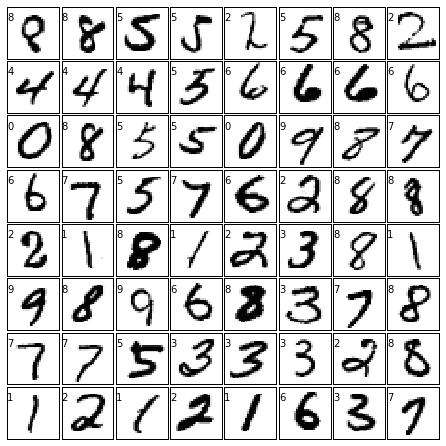

In [4]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [5]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2)
proj_train = pca.fit_transform(X_train)
proj_test = pca.fit_transform(X_test)

<matplotlib.colorbar.Colorbar instance at 0x0000000020940B48>

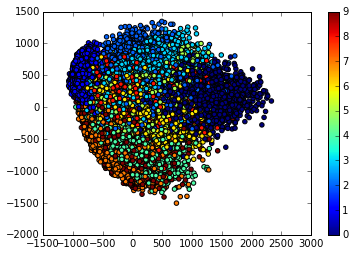

In [6]:
plt.scatter(proj_train[:, 0], proj_train[:, 1], c=y_train)
plt.colorbar()

# test classifier
from sklearn.naive_bayes import GaussianNB

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

In [27]:
# test classifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# train the model
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)

In [54]:
# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
proba = clf.predict_proba(X_test)
expected = y_test

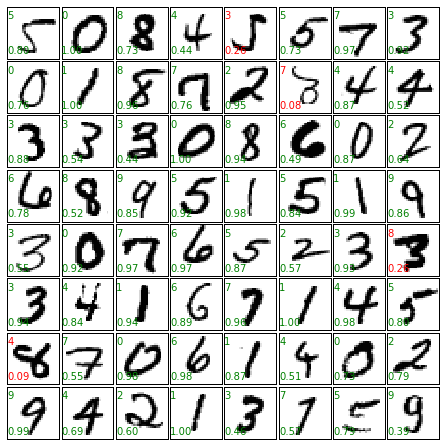

In [55]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary,
              interpolation='nearest')
    
    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 6, str(predicted[i]), color='green')
        ax.text(0, 25, "%0.2f" % proba[i][expected[i]], color='green')
    else:
        ax.text(0, 6, str(predicted[i]), color='red')
        ax.text(0, 25, "%0.2f" % proba[i][expected[i]], color='red')

In [56]:
# accuracy
matches = (predicted == expected)
matches.sum() / float(len(matches))

0.96819047619047616

In [57]:
# f1 score
from sklearn import metrics
print metrics.classification_report(expected, predicted)

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1001
          1       0.98      0.99      0.99      1152
          2       0.96      0.97      0.97      1030
          3       0.96      0.95      0.96      1114
          4       0.96      0.98      0.97      1009
          5       0.97      0.96      0.96       955
          6       0.98      0.98      0.98      1030
          7       0.97      0.96      0.97      1064
          8       0.95      0.96      0.95      1026
          9       0.96      0.96      0.96      1119

avg / total       0.97      0.97      0.97     10500



In [58]:
# confusion matrix
print metrics.confusion_matrix(expected, predicted)

[[ 985    0    1    0    0    3    5    1    6    0]
 [   0 1139    4    1    2    1    1    3    1    0]
 [   5    2  998    1    2    2    5   11    4    0]
 [   4    2   12 1056    1   10    1    7   15    6]
 [   1    2    2    0  984    0    4    1    3   12]
 [   3    1    2    8    2  919    6    0    8    6]
 [   1    3    1    0    3    8 1011    0    3    0]
 [   2    4   13    2    7    0    0 1023    3   10]
 [   1    3    2   15    7    7    2    1  982    6]
 [   4    3    2   12   12    1    1    9    6 1069]]
